# Working with uDALES facet data in Python

This tutorial shows how to inspect uDALES facet outputs (pressure, shear, surface energy balance, and temperatures) with the Python tools in `tools/python`.

## Initialise UDBase
Add the uDALES Python tools to the path and create a `UDBase` instance for experiment 065.

In [89]:
# Preamble
import sys
from pathlib import Path
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Add python tools
sys.path.insert(0, '../../tools/python')
import udgeom, udbase
importlib.reload(udgeom)
importlib.reload(udbase)
from udbase import UDBase

expnr = 65
expdir = Path('C:/Users/mvr/OneDrive - Imperial College London/projects/2024_uDALES_sprint/udales-pp/experiments/065')
sim = UDBase(expnr, expdir)
print(f"Loaded geometry: {sim.geom.n_faces} faces, {sim.geom.n_vertices} vertices")
print(f"Loaded experiment {sim.expnr}")

Loaded geometry: 2658 faces, 1411 vertices
Loaded geometry: 2658 faces, 1411 vertices
Loaded experiment 065


## calculate_frontal_properties
Compute skylines, frontal areas, and blockage ratios.

In [90]:
help(sim.calculate_frontal_properties)

Help on method calculate_frontal_properties in module udbase:

calculate_frontal_properties() -> Dict[str, Any] method of udbase.UDBase instance
    Calculate skyline, frontal areas, and blockage ratios.

    Computes geometric properties of the urban canopy including:
    - Skyline profiles in x and y directions
    - Total frontal areas perpendicular to x and y
    - Blockage ratios (fraction of frontal area blocked)

    Returns
    -------
    res : dict
        Dictionary containing:
        - 'skylinex' : ndarray, shape (jtot, ktot)
            Binary indicator of blocked cells in x-direction (y-z plane)
        - 'skyliney' : ndarray, shape (itot, ktot)
            Binary indicator of blocked cells in y-direction (x-z plane)
        - 'Afx' : float
            Total frontal area perpendicular to x-direction [m²]
        - 'Afy' : float
            Total frontal area perpendicular to y-direction [m²]
        - 'brx' : float
            Blockage ratio in x-direction (dimensionless

In [91]:
res = sim.calculate_frontal_properties()
print(f"x-direction: frontal area = {res['Afx']:.1f} m², blockage ratio = {res['brx']:.3f}")
print(f"y-direction: frontal area = {res['Afy']:.1f} m², blockage ratio = {res['bry']:.3f}")

x-direction: frontal area =    368.0 m², blockage ratio =    0.090
y-direction: frontal area =    208.0 m², blockage ratio =    0.051
x-direction: frontal area = 368.0 m², blockage ratio = 0.090
y-direction: frontal area = 208.0 m², blockage ratio = 0.051


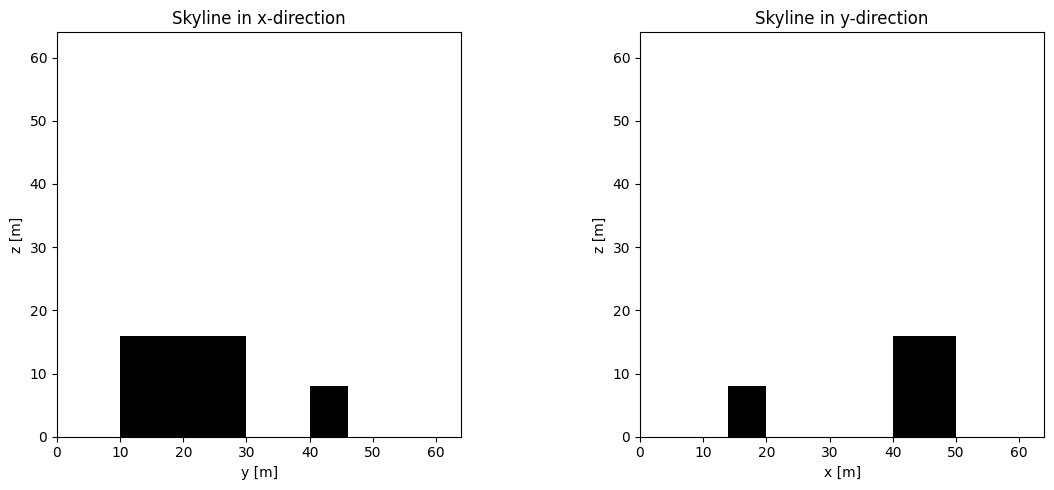

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

c1 = ax1.pcolormesh(sim.yt, sim.zt, res['skylinex'].T, cmap='gray_r', shading='auto')
ax1.set_xlabel('y [m]')
ax1.set_ylabel('z [m]')
ax1.set_aspect('equal')
ax1.set_title('Skyline in x-direction')

c2 = ax2.pcolormesh(sim.xt, sim.zt, res['skyliney'].T, cmap='gray_r', shading='auto')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('z [m]')
ax2.set_aspect('equal')
ax2.set_title('Skyline in y-direction')

plt.tight_layout()
plt.show()

## plot_building_ids
Visualise building IDs for the domain.

In [93]:
help(sim.plot_building_ids)

Help on method plot_building_ids in module udbase:

plot_building_ids(figsize: tuple = (10, 8), cmap: str = 'hsv') method of udbase.UDBase instance
    Plot building IDs from above (x,y view) with distinct colors.

    Creates a top-view plot showing buildings in different colors with
    building IDs displayed at the center of gravity of each building.
    Buildings are numbered from left-bottom to right-top based on their
    centroid positions.

    Parameters
    ----------
    figsize : tuple, default=(10, 8)
        Figure size in inches (width, height)
    cmap : str, default='hsv'
        Matplotlib colormap name for distinct colors

    Raises
    ------
    ValueError
        If geometry is not loaded or has no buildings
    ImportError
        If matplotlib is not installed

    Examples
    --------
    Plot building IDs with default settings:
    >>> sim.plot_building_ids()

    Use custom figure size and colormap:
    >>> sim.plot_building_ids(figsize=(12, 10), cmap='tab2

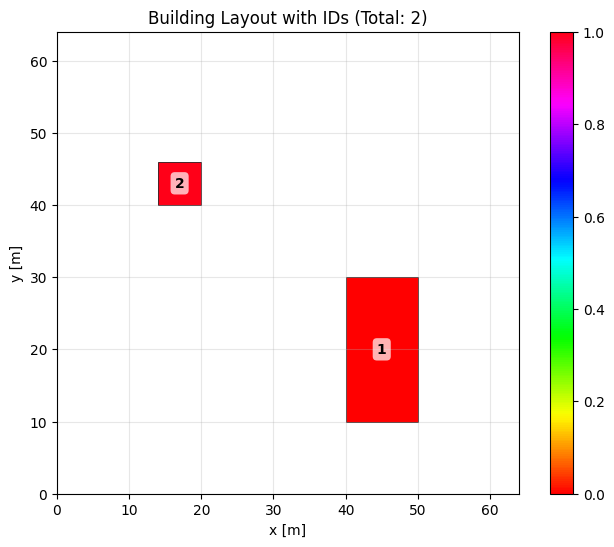

In [94]:
try:
    sim.plot_building_ids(figsize=(8, 6))
    plt.show()
except AttributeError as exc:
    print(f"Skipping building ID plot: geometry lacks outline support ({exc})")

## plot_2dmap
Plot a 2D map of facet data (here the facet type IDs).

In [95]:
help(sim.plot_2dmap)

Help on method plot_2dmap in module udbase:

plot_2dmap(val: Union[float, numpy.ndarray], labels: Union[str, list, NoneType] = None, figsize: tuple = (10, 8), cmap: str = 'viridis', show_colorbar: bool = True) method of udbase.UDBase instance
    Plot a 2D map of buildings colored by a value per building.

    Creates a top-down view showing building outlines colored according
    to specified values, with optional text labels at building centroids.

    Parameters
    ----------
    val : float or ndarray
        Scalar value (applied to all buildings) or vector with one value
        per building. If vector, length must match number of buildings.
    labels : str, list of str, or None, optional
        Text labels to display at the centroid of each building.
        - If str: same label for all buildings
        - If list: must have length equal to number of buildings
        - If None: no labels displayed
    figsize : tuple, default=(10, 8)
        Figure size in inches (width, hei

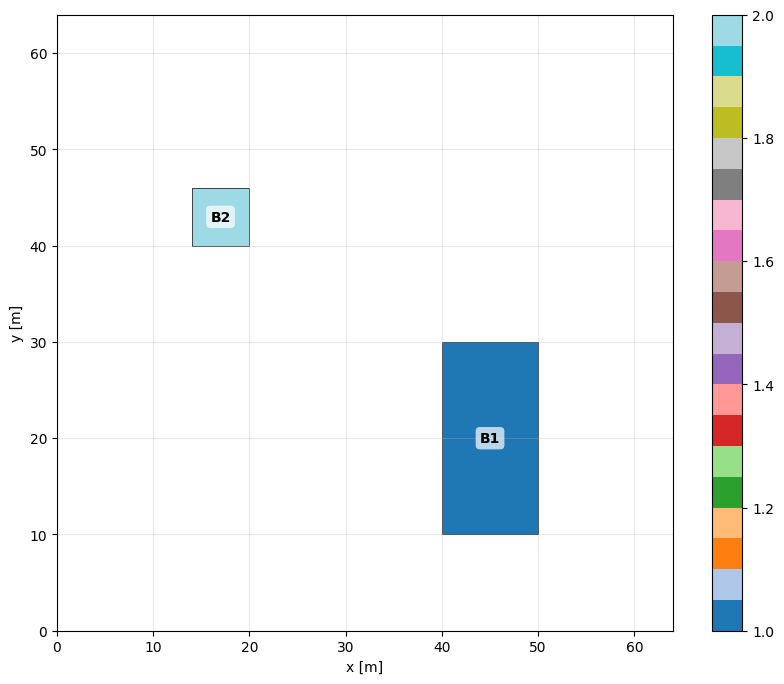

In [96]:
outlines = sim.geom.calculate_outline2d()
vals = np.arange(1, len(outlines) + 1)
labels = [f"B{i}" for i in vals]
sim.plot_2dmap(vals, labels=labels, cmap='tab20')
plt.show()

## plot_fac_type
Display surface types per facet.

In [97]:
help(sim.plot_fac_type)

Help on method plot_fac_type in module udbase:

plot_fac_type(figsize: tuple = (12, 10), show_legend: bool = True) method of udbase.UDBase instance
    Plot the different surface types in the geometry.

    This method visualizes the facet types defined in the simulation,
    coloring each surface type differently. Useful for verifying that
    wall properties are correctly assigned.

    Parameters
    ----------
    figsize : tuple, default=(12, 10)
        Figure size in inches (width, height)
    show_legend : bool, default=True
        If True, display a legend with surface type names

    Raises
    ------
    ValueError
        If required data (geometry, facets, factypes) is not loaded
    ImportError
        If matplotlib is not installed

    Examples
    --------
    >>> sim = UDBase(101, 'experiments/101')
    >>> sim.plot_fac_type()



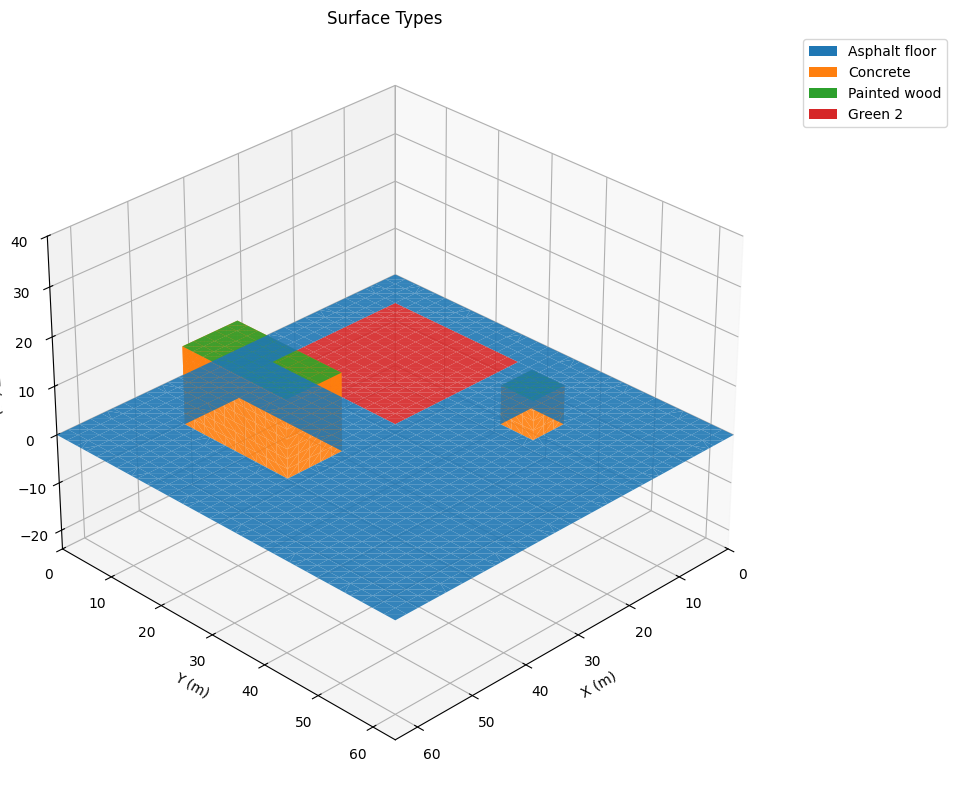

In [98]:
sim.plot_fac_type(figsize=(10, 8))
plt.show()

## assign_prop_to_fac and plot_fac
Assign properties (e.g., albedo) to each facet and visualise.

In [99]:
help(sim.assign_prop_to_fac)

Help on method assign_prop_to_fac in module udbase:

assign_prop_to_fac(prop: str) -> numpy.ndarray method of udbase.UDBase instance
    Assign facet type property to individual facets.

    Parameters
    ----------
    prop : str
        Property name from factypes (e.g., 'al', 'em', 'z0', 'lam')

    Returns
    -------
    ndarray
        Property values for each facet

    Examples
    --------
    >>> albedo = sim.assign_prop_to_fac('al')
    >>> emissivity = sim.assign_prop_to_fac('em')



In [100]:
albs = sim.assign_prop_to_fac('al')
print(f"Albedo assigned to {len(albs)} facets; range {albs.min():.3f}–{albs.max():.3f}")

Albedo assigned to 2658 facets; range 0.080–0.500


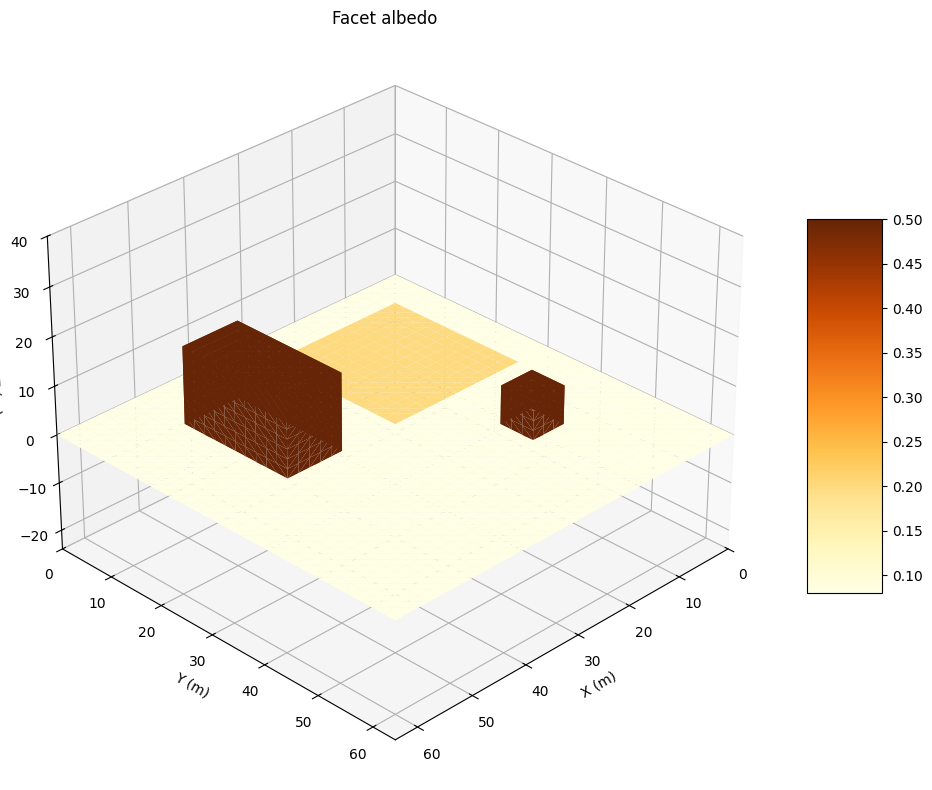

In [101]:
sim.plot_fac(albs, cmap='YlOrBr', title='Facet albedo')
plt.show()

## load_fac_momentum
Load facet pressure and shear stresses.


Contents of fac.065.nc:
Name                 Dimensions                     Shape               
----------------------------------------------------------------------
cth                  fct, time                      2658 x 1000         
htc                  fct, time                      2658 x 1000         
pres                 fct, time                      2658 x 1000         
t                    time                           1000                
tau_x                fct, time                      2658 x 1000         
tau_y                fct, time                      2658 x 1000         
tau_z                fct, time                      2658 x 1000         
<xarray.Dataset> Size: 64MB
Dimensions:  (time: 1000, fct: 2658)
Coordinates:
  * fct      (fct) int32 11kB -2147483647 -2147483647 ... -2147483647
Dimensions without coordinates: time
Data variables:
    t        (time) float32 4kB ...
    tau_x    (fct, time) float32 11MB ...
    tau_y    (fct, time) float32 11MB ...

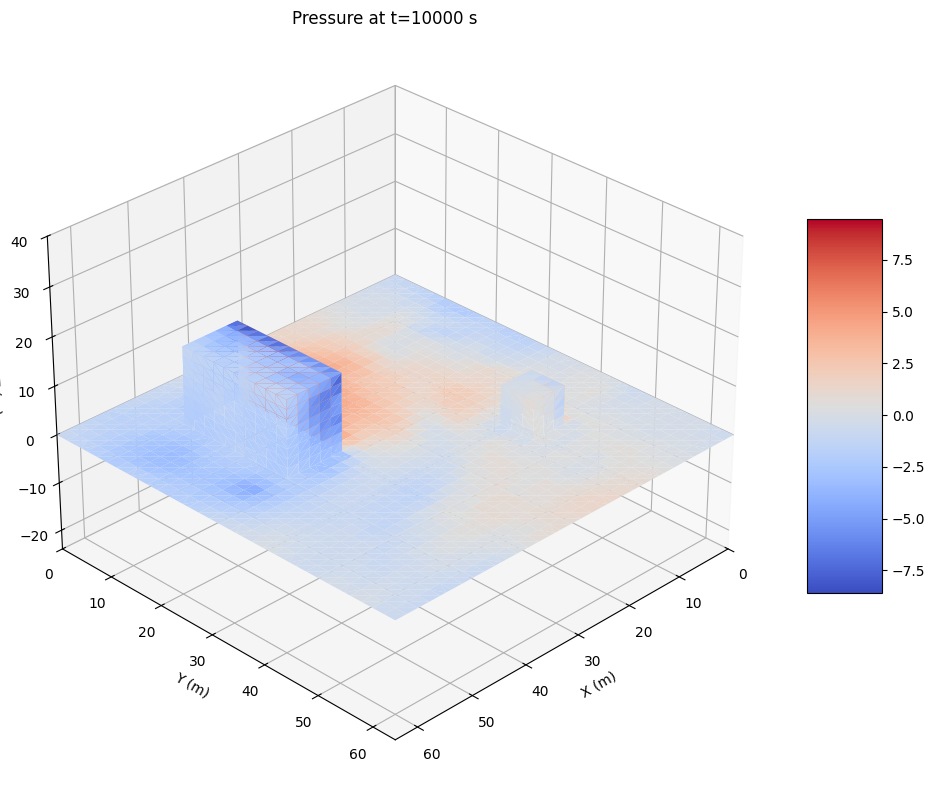

In [102]:
fac_mom = sim.load_fac_momentum()
print(fac_mom)
time_idx = -1
t_val = float(fac_mom['t'].data[time_idx])
pres_slice = fac_mom['pres'].isel(time=time_idx).data  # shape (n_facets,)
sim.plot_fac(pres_slice, cmap='coolwarm', title=f'Pressure at t={t_val:.0f} s')
plt.show()

## load_fac_eb
Load surface energy balance terms (net shortwave, longwave, sensible/latent heat, ground heat).


Contents of facEB.065.nc:
Name                 Dimensions                     Shape               
----------------------------------------------------------------------
LWin                 fct, time                      2658 x 10020        
LWout                fct, time                      2658 x 10020        
WGR                  fct, time                      2658 x 10020        
ef                   fct, time                      2658 x 10020        
hf                   fct, time                      2658 x 10020        
netsw                fct, time                      2658 x 10020        
t                    time                           10020               
<xarray.Dataset> Size: 639MB
Dimensions:  (time: 10020, fct: 2658)
Coordinates:
  * fct      (fct) int32 11kB -2147483647 -2147483647 ... -2147483647
Dimensions without coordinates: time
Data variables:
    t        (time) float32 40kB ...
    netsw    (fct, time) float32 107MB ...
    LWin     (fct, time) float32 10

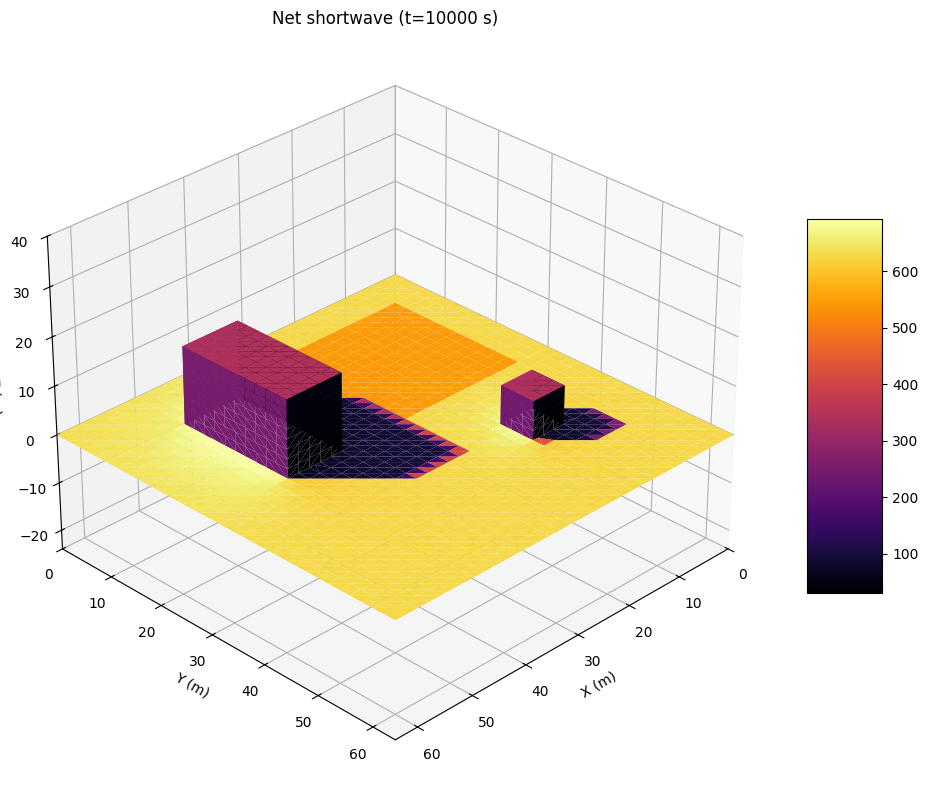

In [103]:
fac_eb = sim.load_fac_eb()
print(fac_eb)
t_idx = -1
t_plot = float(fac_eb['t'].data[t_idx])
netsw_slice = fac_eb['netsw'].isel(time=t_idx).data  # shape (n_facets,)
sim.plot_fac(netsw_slice, cmap='inferno', title=f'Net shortwave (t={t_plot:.0f} s)')
plt.show()

## load_seb
Load all SEB components as NumPy arrays and check a sample energy balance.

SEB keys: ['Kstar', 'Lstar', 'Lin', 'Lout', 'H', 'E', 'G', 'Tsurf', 't']
Mean residual (K+L-H-E-G) at t[-1] = -0.003 W/m²


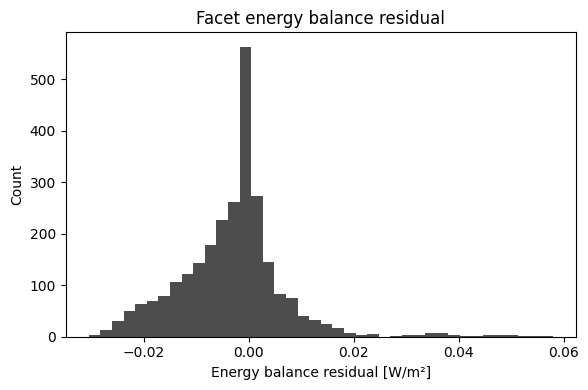

In [104]:
seb = sim.load_seb()
print('SEB keys:', list(seb.keys()))
time_idx = -1
Kstar = seb['Kstar'][:, time_idx]
Lstar = seb['Lstar'][:, time_idx]
H = seb['H'][:, time_idx]
E = seb['E'][:, time_idx]
G = seb['G'][:, time_idx]
qnet = Kstar + Lstar - H - E - G
print(f"Mean residual (K+L-H-E-G) at t[{time_idx}] = {qnet.mean():.3f} W/m²")
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(qnet, bins=40, color='0.3')
ax.set_xlabel('Energy balance residual [W/m²]')
ax.set_ylabel('Count')
ax.set_title('Facet energy balance residual')
plt.tight_layout()
plt.show()

## area_average_seb
Compute domain-averaged SEB components and plot the time series.

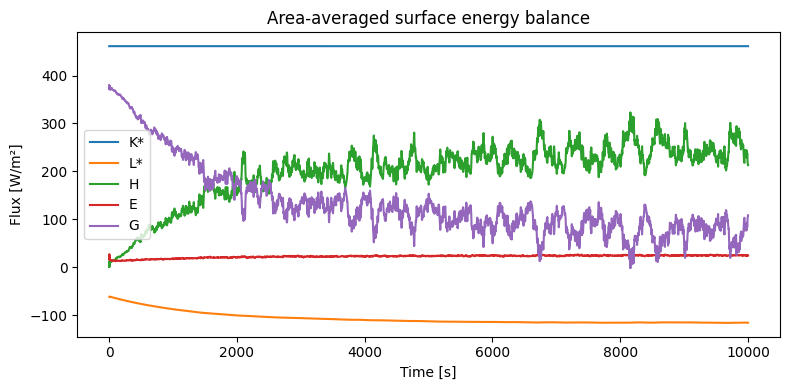

In [105]:
seb_avg = sim.area_average_seb(seb)
t = seb_avg['t']
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, seb_avg['Kstar'], label='K*')
ax.plot(t, seb_avg['Lstar'], label='L*')
ax.plot(t, seb_avg['H'], label='H')
ax.plot(t, seb_avg['E'], label='E')
ax.plot(t, seb_avg['G'], label='G')
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Flux [W/m²]')
ax.set_title('Area-averaged surface energy balance')
plt.tight_layout()
plt.show()

## load_fac_temperature
Inspect temperatures inside each facet layer.


Contents of facT.065.nc:
Name                 Dimensions                     Shape               
----------------------------------------------------------------------
T                    fct, lyr, time                 2658 x 6 x 10020    
dTdz                 fct, lyr, time                 2658 x 6 x 10020    
t                    time                           10020               
<xarray.Dataset> Size: 1GB
Dimensions:  (time: 10020, fct: 2658, lyr: 6)
Coordinates:
  * fct      (fct) int32 11kB -2147483647 -2147483647 ... -2147483647
  * lyr      (lyr) int32 24B -2147483647 -2147483647 ... -2147483647 -2147483647
Dimensions without coordinates: time
Data variables:
    t        (time) float32 40kB ...
    T        (fct, lyr, time) float32 639MB ...
    dTdz     (fct, lyr, time) float32 639MB ...
Attributes:
    title:    facT.065.nc
    history:  Created on 20241220 at 135734.721
    Source:   DALES U
    Author:   


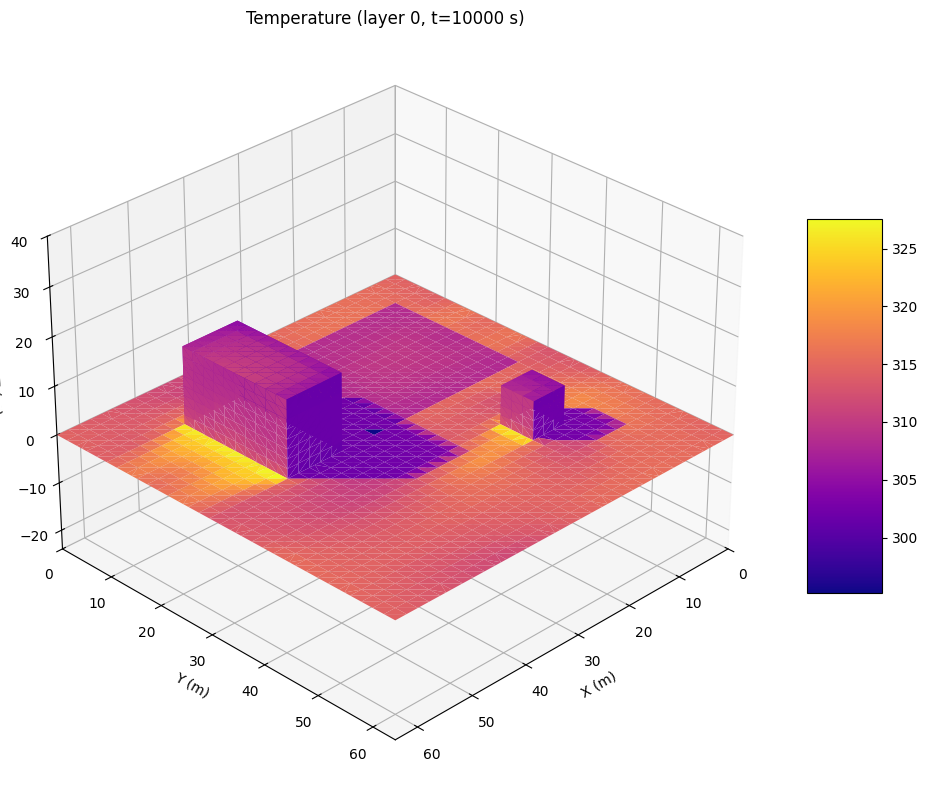

In [106]:
facT = sim.load_fac_temperature()
print(facT)
time_idx = -1
lyr_idx = 0  # outermost layer
t_val = float(facT['t'].data[time_idx])
T_slice = facT['T'].isel(time=time_idx, lyr=lyr_idx).data  # shape (n_facets,)
sim.plot_fac(T_slice, cmap='plasma', title=f'Temperature (layer {lyr_idx}, t={t_val:.0f} s)')
plt.show()

## Next steps
- Compare different experiments by changing `expnr`/`expdir`.
- Use `convert_fac_to_field` to map facet fields to the grid for coupling with volume data.
- Save figures with `plt.savefig(...)` if needed.